In [2]:
import os, sys
import glob
lib_path = os.path.abspath(os.path.join('..', '..', 'utils'))
sys.path.append(lib_path)
import matplotlib.pyplot as plt
from GraphType import GraphStat
import readCSV as reader
import constants

In [3]:
def getModels(folderName, numberOfModels):
    filenames = reader.readmultiplefiles(folderName, numberOfModels, False)
    graphStats = [GraphStat(filename) for filename in filenames]
    return graphStats

In [4]:
def drawTypeDistributions(folderName, numberOfModels):
    graphStats = getModels(folderName, numberOfModels)
    typeMap = {}
    keys = set()
    for g in graphStats:
        keys = keys.union(set(g.nodeTypeStat.keys()))
    for key in keys:
        typeMap[key] = [float(g.nodeTypeStat.get(key,0)) for g in graphStats]
    print(list(typeMap.keys()))
    for i, key in enumerate(typeMap.keys()):
        plt.figure(i)
        plt.hist(typeMap[key], range = (0,1), bins=50)
        plt.title(key)
        plt.plot()

['EPackage', 'EAttribute', 'EEnumLiteral', 'EGenericType', 'EAnnotation', 'EOperation', 'EEnum', 'ETypeParameter', 'EParameter', 'EReference', 'EClass', 'EStringToStringMapEntry', 'EDataType']


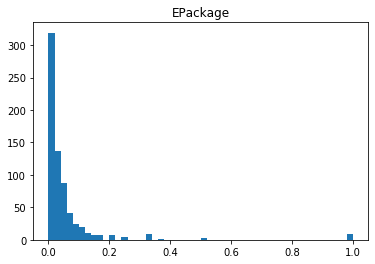

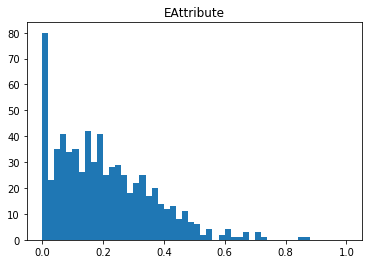

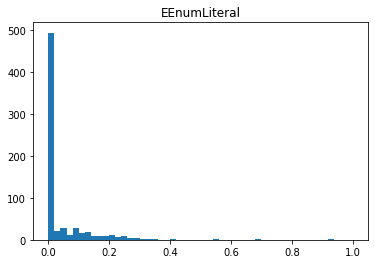

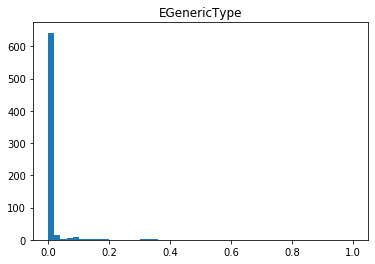

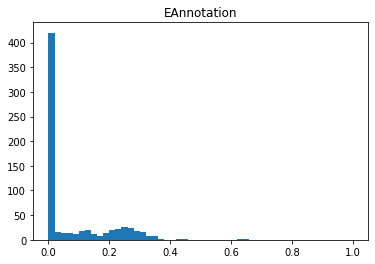

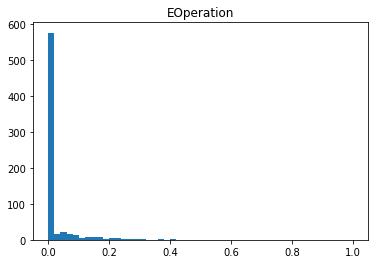

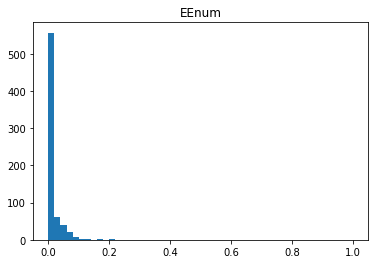

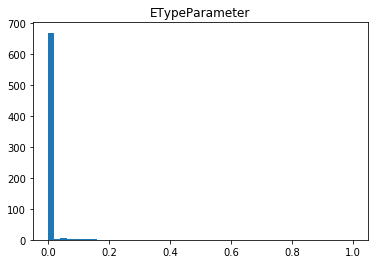

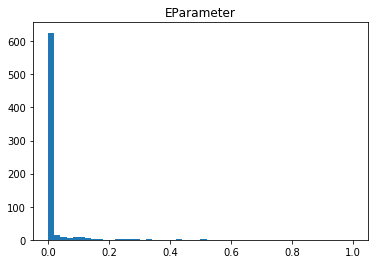

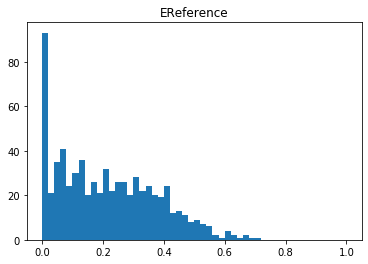

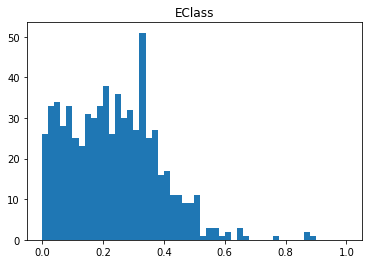

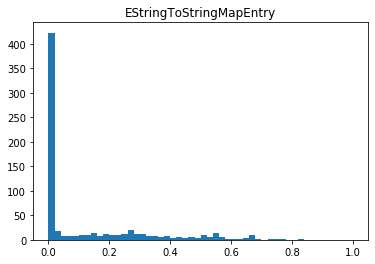

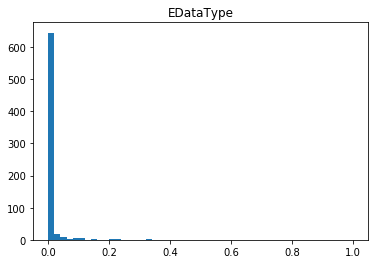

In [4]:
drawTypeDistributions('../input/human/', 1500)

In [5]:
drawTypeDistributions('../input/viatra_75/', 50)

[]


## Extract Human Models with size [90, 101]

In [6]:
def extractModel():
    from shutil import copy
    list_of_files = reader.readmultiplefiles('../input/humanOutput/', 5000)
    num_nodes_list =[]
    human_size_dic = {}
    for file in list_of_files:
        contents = reader.readcsvfile(file)
        num_of_node = contents[constants.NUMBER_NODES]
        # human_size_dic[file] = int(num_of_node[0])
        # num_nodes_list.append(int(num_of_node[0]))
        if 90 <= num_of_node[0] <= 110:
            copy(file, '../input/human_output_100/')

## Multinomial Distribution Analysis

In [7]:
import numpy as np
import scipy.stats as stats
graphStats = getModels('../input/human_30_500_no_xml/', 1500)
totalNodes = 0
typeMap = {}
for g in graphStats:
    gKeys = g.nodeTypeStat.keys()
    size = g.numNodes[0]
    totalNodes += size
    for key in gKeys:
        curNum = typeMap.get(key, 0)
        typeMap[key] = curNum + float(g.nodeTypeStat[key]) * size
        
for key in typeMap.keys():
    typeMap[key] /= totalNodes
print(sum(typeMap.values()))
print(typeMap)

0.9999999999999998
{'EAttribute': 0.23539778449144008, 'EClass': 0.30996978851963747, 'EReference': 0.33081570996978854, 'EPackage': 0.012789526686807653, 'EAnnotation': 0.002517623363544813, 'EEnumLiteral': 0.07275931520644502, 'EEnum': 0.013645518630412891, 'EDataType': 0.004028197381671702, 'EParameter': 0.005941591137965764, 'EGenericType': 0.002014098690835851, 'EOperation': 0.009415911379657605, 'ETypeParameter': 0.0007049345417925478}


In [8]:
def chiSquareMultinomialTest(freq, prob):
    freq = np.array(freq)
    prob = np.array(prob)
    size = sum(freq)
    e = prob * size
    return stats.chisquare(freq, e)

In [9]:
def typeDistributionTest(g):
    size = g.numNodes[0]
    freq = []
    prob = []
    for key in typeMap.keys():
        value = float(g.nodeTypeStat.get(key, 0))
        freq.append(np.round(value * size))
        prob.append(typeMap[key])
    test = chiSquareMultinomialTest(freq, prob)
    return test

In [32]:
test = [typeDistributionTest(graphStats[i]) for i in range(len(graphStats))]
print(np.mean(test, 0))
print(np.median(test, 0))

[7.26359261e+01 6.82490355e-02]
[3.31848655e+01 1.59841378e-03]


## Node Counts Distribution

In [5]:
import matplotlib.pyplot as plt
from shutil import copyfile
import statistics 

graphStats = getModels('../input/human/', 1500)
sizes = []
filenames = reader.readmultiplefiles('../input/human/', 1500, False)
count = 1
for filename in filenames:
    graphStat = GraphStat(filename)
    size = graphStat.numNodes[0]
    if size >= 30 and size <= 500 and not ('EAnnotation' in graphStat.nodeTypeStat.keys() and 'EStringToStringMapEntry' in graphStat.nodeTypeStat.keys()):
        copyfile(filename, filename.replace('human', 'human_30_500_no_xml'))
        
        
# for g in graphStats:
#     size = g.numNodes[0]
#     if size >= 30 and size <= 500 and not ('EAnnotation' in g.nodeTypeStat.keys() and 'EStringToStringMapEntry' in g.nodeTypeStat.keys()):
#         sizes.append(g.numNodes[0])
# print(max(sizes))
# print(min(sizes))
# print(statistics.mean(sizes))
# print(len(sizes))
# plt.hist(sizes, bins=10)
